# 1. Create a QASM/Pulse Schedule

In [1]:
from quantify.scheduler.types import Schedule
from quantify.scheduler.gate_library import X, X90, Y, Y90, Measure, CZ, Reset
from quantify.scheduler.pulse_library import SquarePulse, ModSquarePulse, IdlePulse

In [2]:
sched = Schedule("Qblox Demo")

q0, q1 = ('q0', 'q1') # we use strings because Resources have not been implemented yet

init_all = sched.add(Reset(q0, q1))
start    = sched.add(X90(q1))
GateY    = sched.add(Y(q0), ref_op=start, ref_pt='center')
GateX    = sched.add(X90(q1), ref_op=start, ref_pt='end')
GateY2   = sched.add(Y(q1), ref_op=GateX, ref_pt='end')
GateY3   = sched.add(Y(q0), ref_op=GateY2, ref_pt='center')
GateY4   = sched.add(Y90(q1), ref_op=GateY2, ref_pt='end')

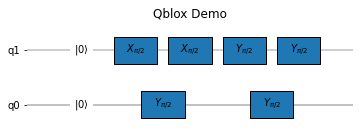

In [3]:
from quantify.scheduler.visualization.circuit_diagram import circuit_diagram_matplotlib

f, ax = circuit_diagram_matplotlib(sched)

# 2. Translate to pulse schedule visualization

In [4]:
DEVICE_CFG = {
   "qubits":{
        "q0": {
            "resource_map": {
                "port_mw": "q0.mw",     # defines what port to apply mw on
                "port_ro": "q0.res",    # defines what port to apply readout pulses on
                "port_flux": "q0.fl",   # defines what port to apply flux pulses on
                "clock_01": "q0.01",    # defines a clock that tracks the 0-1 transition of the qubit
                "clock_ro": "q0.ro"     # defines a clock that tracks the readout resonator
                }, 
           "params": {
                "mw_freq": 6.02e9,      # this is the qubit frequency. 
                "mw_amp180": 0.6e-3,
                "mw_motzoi": 0.45,
                "mw_duration": 16e-9,
                "mw_ef_amp180": 0.87,

                "ro_freq": 7.04e9,
                "ro_pulse_amp": 0.5e-3,
                "ro_pulse_type": "square",
                "ro_pulse_duration": 150e-9,
                "ro_acq_delay": 120e-9,
                "ro_acq_integration_time": 2500e-9,
                "ro_acq_weigth_type": "SSB",

                "init_duration": 10e-6
                }, 
              }, 
        "q1": {
            "resource_map": {
                "port_mw": "q1.mw", # defines what port to apply mw on
                "port_ro": "q1.res",    # defines what port to apply readout pulses on
                "port_flux": "q1.fl",   # defines what port to apply flux pulses on
                "clock_01": "q1.01",      # defines a clock that tracks the 0-1 transition of the qubit
                "clock_ro": "q1.ro"      # defines a clock that tracks the readout resonator
                }, 
           "params": {
                "mw_freq": 5.02e9,  # this is the qubit frequency. 
                "mw_amp180": 0.8e-3,
                "mw_motzoi": 0.25,
                "mw_duration": 50e-9,
                "mw_ef_amp180": 0.67,

                "ro_freq": 6.9e9,
                "ro_pulse_amp": 0.5e-3,
                "ro_pulse_type": "square",
                "ro_pulse_duration": 150e-9,
                "ro_acq_delay": 120e-9,
                "ro_acq_integration_time": 2500e-9,
                "ro_acq_weigth_type": "SSB",

                "init_duration": 10e-6
               }, 
              },
            },
    "edges": { 
        "q0-q1": {
            "resource_map": {
                "q0": "q0:fl", 
                "p1": "q1:fl" # parking port if required
                }, 
            "params": {
                "flux_duration": 40e-9,
                "flux_ch_control": "qcm0.s1", "flux_ch_target": "qcm1.s1",
                "flux_amp_control": 0.5,  "flux_amp_target": 0,
                "phase_correction_control": 0,
                "phase_correction_target": 0},
            },
        },
    }

In [5]:
sched = Schedule("Qblox Demo")

q0, q1 = ('q0', 'q1') # we use strings because Resources have not been implemented yet

init_all = sched.add(Reset(q0, q1))
start    = sched.add(X90(q1))
GateY    = sched.add(Y(q0), ref_op=start, ref_pt='center')
GateX    = sched.add(X90(q1), ref_op=start, ref_pt='end')
Square   = sched.add(ModSquarePulse(amp=0.5e-3, duration=20e-9, clock='q0.01', port='q0.mw'), ref_op=GateX, ref_pt='end')
GateY2   = sched.add(Y(q1), ref_op=GateX, ref_pt='end')
GateY3   = sched.add(Y(q0), ref_op=GateY2, ref_pt='center')
GateY4   = sched.add(Y90(q1), ref_op=GateY2, ref_pt='end')

In [6]:
sched.data

{'operation_dict': {-8103148634285370103: {'gate_info': {'unitary': None, 'tex': '$|0\\rangle$', 'plot_func': 'quantify.scheduler.visualization.circuit_diagram.reset', 'qubits': ['q0', 'q1'], 'operation_type': 'reset'}, 'pulse_info': [], 'logic_info': {}, 'name': "Reset ('q0', 'q1')"},
  5766894325700231686: {'gate_info': {'unitary': array([[0.70710678+0.j        , 0.        -0.70710678j],
         [0.        -0.70710678j, 0.70710678+0.j        ]]), 'tex': '$X_{\\pi/2}$', 'plot_func': 'quantify.scheduler.visualization.circuit_diagram.gate_box', 'qubits': ['q1'], 'operation_type': 'Rxy', 'theta': 90, 'phi': 0}, 'pulse_info': [], 'logic_info': {}, 'name': 'X_{90} q1'},
  6357596744174391481: {'gate_info': {'unitary': array([[ 6.123234e-17+0.000000e+00j, -1.000000e+00-6.123234e-17j],
         [-1.000000e+00-6.123234e-17j,  6.123234e-17+0.000000e+00j]]), 'tex': '$Y_{\\pi/2}$', 'plot_func': 'quantify.scheduler.visualization.circuit_diagram.gate_box', 'qubits': ['q0'], 'operation_type': 'Rxy

In [7]:
from quantify.scheduler.compilation import _add_pulse_information_transmon, _determine_absolute_timing

sched = _add_pulse_information_transmon(schedule=sched, device_cfg=DEVICE_CFG)
sched = _determine_absolute_timing(schedule=sched)

sched.data

{'operation_dict': {-8103148634285370103: {'gate_info': {'unitary': None, 'tex': '$|0\\rangle$', 'plot_func': 'quantify.scheduler.visualization.circuit_diagram.reset', 'qubits': ['q0', 'q1'], 'operation_type': 'reset'}, 'pulse_info': [{'wf_func': None, 't0': 0, 'duration': 1e-05, 'port': None}], 'logic_info': {}, 'name': "Reset ('q0', 'q1')"},
  5766894325700231686: {'gate_info': {'unitary': array([[0.70710678+0.j        , 0.        -0.70710678j],
         [0.        -0.70710678j, 0.70710678+0.j        ]]), 'tex': '$X_{\\pi/2}$', 'plot_func': 'quantify.scheduler.visualization.circuit_diagram.gate_box', 'qubits': ['q1'], 'operation_type': 'Rxy', 'theta': 90, 'phi': 0}, 'pulse_info': [{'wf_func': 'quantify.scheduler.waveforms.drag', 'G_amp': 0.0004000000000000001, 'D_amp': 0.00010000000000000002, 'duration': 5e-08, 'phase': 0, 'nr_sigma': 4, 'clock': 'q1.01', 'port': 'q1.mw', 't0': 0}], 'logic_info': {}, 'name': 'X_{90} q1'},
  6357596744174391481: {'gate_info': {'unitary': array([[ 6.12

In [8]:
from quantify.scheduler.visualization.pulse_scheme import pulse_diagram_plotly

# pulse_diagram_plotly(sched, port_list=["q0.mw", "q0.res", "q1.mw"], sampling_rate = 1e11)
pulse_diagram_plotly(sched, port_list=["q0.mw", "q0.res", "q1.mw"], modulation_if = 10e6, sampling_rate = 1e11)

{'q0.mw': 0, 'q0.res': 1, 'q1.mw': 2}


# 3. Mapping to hardware

In [9]:
MAPPING_CFG = {
        "qcm0": {
                "name": "qcm0",
                "type": "Pulsar_QCM",
                "mode": "complex",
                "ref" : "int",
                "IP address": "192.168.0.3",
                "complex_output_0": {"port": "q0.mw", "gain": -63, "nco_freq": 5.e6+0.5},  # defines port and gain to the complex output is connected
                # "complex_output_1": {"port": "q1.mw", "gain": -60, "nco_freq": 0}   # defines port and gain to the complex output is connected
                },   
        "qcm1": {
                "name": "qcm1",
                "type": "Pulsar_QCM",
                "mode": "complex",
                "ref" : "ext",
                "IP address": "192.168.0.2",
                # "complex_output_0": {"port": "q0.mw", "gain": -60, "nco_freq": 5.e6+0.5},  # defines port and gain to the complex output is connected
                "complex_output_1": {"port": "q1.mw", "gain": -60, "nco_freq": 0}   # defines port and gain to the complex output is connected
                },                            
            }

In [10]:
from quantify.scheduler.backends.pulsar_backend import pulsar_assembler_backend, configure_pulsars
from pulsar_qcm.pulsar_qcm import pulsar_qcm
from qcodes import Instrument

sched, config, instr, = pulsar_assembler_backend(sched, MAPPING_CFG)
instr = configure_pulsars(config, MAPPING_CFG)

for key in instr:
    pulsar = Instrument.find_instrument(key)
    pulsar.arm_sequencer()
    pulsar.start_sequencer()
    print(pulsar.get_system_status())

{'status': 'OKAY', 'flags': []}
{'status': 'OKAY', 'flags': []}


In [11]:
MAPPING_CFG = {
        "qcm0": {
                "name": "qcm0",
                "type": "Pulsar_QCM",
                "mode": "complex",
                "ref" : "ext",
                "IP address": "192.168.0.2",
                "complex_output_0": {"port": "q0.mw", "gain": -60.0, "nco_freq": 50e6},  # defines port and gain to the complex output is connected
                "complex_output_1": {"port": "q1.mw", "gain": -60.0, "nco_freq": -50e6}   # defines port and gain to the complex output is connected
                },      
        "qcm1": {
                "name": "qcm1",
                "type": "Pulsar_QCM",
                "mode": "real",
                "ref" : "ext",              
                "IP address": "192.168.0.3",
                "real_output_0": {"port": "q0.fl", "gain": -60.0},       # defines port and gain to the real output is connected
                "real_output_1": {"port": "q1.fl", "gain": -60.0},       # defines port and gain to the real output is connected
                "real_output_2": {"port": "q2.fl", "gain": -60.0},       # defines port and gain to the real output is connected
                "real_output_3": {"port": "q3.fl", "gain": -60.0}        # defines port and gain to the real output is connected
                },             
        "qrm0": {
                "name": "qrm0",
                "type": "Pulsar_QRM",
                "mode": "complex",
                "ref" : "ext",
                "input_range": 1.0,
                "IP address": "192.168.0.4",
                "complex_output_0": {"port": ["q0.res", "q1.res"], "gain": -60.0, "lo_freq" : 7e9}, # defines port and gain to the complex output is connected
                "complex_input_0": {"port": ["q0.res", "q1.res"], "gain": -60.0, "lo_freq" : 7e9}  # defines port and gain to the complex input is connected
                },                
            }